In [2]:
# preprocessing & MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler 
data = [[-1,2],[-0.5,6],[0,10],[1,18]] 
import pandas as pd 
pd.DataFrame(data) 

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [3]:
scaler = MinMaxScaler() 
scaler = scaler.fit(data) 
result = scaler.transform(data) 
result 

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [4]:
#
result_ = scaler.fit_transform(data) 

In [5]:
result_ 

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [6]:
#归一化后的结果逆转
scaler.inverse_transform(result) 

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [7]:
#可以归一化到【0,1】以外的范围中
#feature_range 
data = [[-1,2],[-0.5,6],[0,10],[1,18]] 
scaler = MinMaxScaler(feature_range = [5,10]) 
result = scaler.fit_transform(data) 
result 

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [9]:
#standard scaler 
#让数据符合正态分布 
from sklearn.preprocessing import StandardScaler 
data = [[-1,2],[-0.5,6],[0,10],[1,18]] 
scaler = StandardScaler() 
scaler.fit(data) 
scaler.mean_, scaler.var_ 

(array([-0.125,  9.   ]), array([ 0.546875, 35.      ]))

In [14]:
x_std = scaler.transform(data)
x_std 

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [16]:
x_std.mean(),x_std.var()  

(0.0, 1.0)

In [17]:
scaler.inverse_transform(x_std) 

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [18]:
#缺失值 
import pandas as pd 
data = pd.read_csv('Narrativedata.csv',index_col = 0) 
data.head() 

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [19]:
data.shape, data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


((891, 4), None)

In [25]:
#age,embark contain null value 
#process age value 
Age = data.loc[:,'Age'].values.reshape(-1,1) 
from sklearn.impute import SimpleImputer 
#use mean value, meadian value  and 0 to fill nan 
imp_mean = SimpleImputer(strategy = 'mean') 
imp_median = SimpleImputer(strategy = 'median') 
imp_0 = SimpleImputer(strategy = 'constant'
                      ,fill_value = 0) 
imp_mean = imp_mean.fit_transform(Age) 
imp_median = imp_median.fit_transform(Age) 
imp_0 = imp_0.fit_transform(Age) 

imp_mean[:20],imp_median[:20],imp_0[:20] 

(array([[22.        ],
        [38.        ],
        [26.        ],
        [35.        ],
        [35.        ],
        [29.69911765],
        [54.        ],
        [ 2.        ],
        [27.        ],
        [14.        ],
        [ 4.        ],
        [58.        ],
        [20.        ],
        [39.        ],
        [14.        ],
        [55.        ],
        [ 2.        ],
        [29.69911765],
        [31.        ],
        [29.69911765]]),
 array([[22.],
        [38.],
        [26.],
        [35.],
        [35.],
        [28.],
        [54.],
        [ 2.],
        [27.],
        [14.],
        [ 4.],
        [58.],
        [20.],
        [39.],
        [14.],
        [55.],
        [ 2.],
        [28.],
        [31.],
        [28.]]),
 array([[22.],
        [38.],
        [26.],
        [35.],
        [35.],
        [ 0.],
        [54.],
        [ 2.],
        [27.],
        [14.],
        [ 4.],
        [58.],
        [20.],
        [39.],
        [14.],
        [55

In [26]:
#use median value to fill 
data.loc[:,'Age'] = imp_median 

In [27]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [28]:
#use frequency to fill embarked column 
Embarked = data.loc[:,'Embarked'].values.reshape(-1,1) 
imp_freq = SimpleImputer(strategy = 'most_frequent') 
data.loc[:,'Embarked'] = imp_freq.fit_transform(Embarked) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [29]:
#处理分类型特征，编码与哑变量 
from sklearn.preprocessing import LabelEncoder 
y = data.iloc[:,-1] 
le = LabelEncoder() 
label = le.fit_transform(y)  
le.classes_, label 

(array(['No', 'Unknown', 'Yes'], dtype=object),
 array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
        2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
        2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
        2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
        0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
        1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
        2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
        0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0,

In [31]:
data.iloc[:,-1] = label 
data.head() 

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [32]:
#ordinal encoder  
#将分类特征转化为分类数值 
from sklearn.preprocessing import OrdinalEncoder 
data_ = data.copy() 
data_.head() 

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [35]:
data_.iloc[:,1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:,1:-1]) 
data_.head() 

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


In [41]:
#onehotencoder 
from sklearn.preprocessing import OneHotEncoder 
X = data.iloc[:,1:-1]   

In [42]:
enc = OneHotEncoder(categories = 'auto').fit(X) 
result = enc.transform(X).toarray() 
result 

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [43]:
newdata = pd.concat([data,pd.DataFrame(result)],axis = 1) 
newdata.head() 

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0,0.0,1.0,0.0,0.0,1.0


In [46]:
newdata.drop(['Sex','Embarked'],axis = 1,inplace = True) 

In [47]:
newdata.columns = ['Age','Survived','Female','Male',
                   'Embarked_C','Embarked_Q','Embarked_S'] 
newdata.head() 

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [49]:
#处理连续型特征1
#二值化与分段 
data_2 = data.copy() 
from sklearn.preprocessing import Binarizer 
X = data_2.iloc[:,0].values.reshape(-1,1) 
transformer = Binarizer(threshold = 30).fit_transform(X) 
transformer[:20] 

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [56]:
#KBinsDiscretizer 
from sklearn.preprocessing import KBinsDiscretizer 
X = data.iloc[:,0].values.reshape(-1,1) 
est = KBinsDiscretizer(n_bins = 3,encode ='ordinal',strategy = 'uniform')
est.fit_transform(X)[:20]
                

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [58]:
est = KBinsDiscretizer(n_bins = 3,encode = 'onehot',strategy = 'uniform') 
est.fit_transform(X).toarray() 

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [59]:
#feature selection 
#导入数据，使用digit recognizor 
import pandas as pd 
data = pd.read_csv('digit recognizor.csv') 
X = data.iloc[:,1:] 
y = data.iloc[:,0] 

X.shape 

(42000, 784)

In [60]:
#Filter 过滤 
# variance threshold 
from sklearn.feature_selection import VarianceThreshold 
selector = VarianceThreshold() #不填，默认方差为0
x_var0 = selector.fit_transform(X) 
x_var0.shape  

(42000, 708)

In [62]:
import numpy as np 
x_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X) 
x_fsvar.shape 

(42000, 392)

In [64]:
#相关性过滤 
#卡方过滤 
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.model_selection import cross_val_score 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

x_fschi =SelectKBest(chi2,k=300).fit_transform(x_fsvar,y) 
x_fschi.shape 

(42000, 300)

In [66]:
cross_val_score(RFC(n_estimators = 10,random_state = 0),x_fschi,y,cv = 5).mean() 


0.9344761904761905

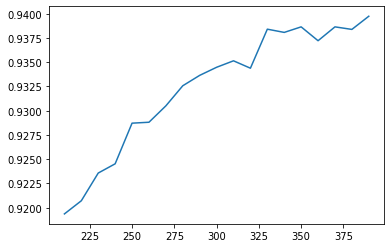

In [69]:
#选取合适的超参数k 
%matplotlib inline 
import matplotlib.pyplot as plt 

score  =[] 
for i in range(390,200,-10): 
    x_fschi = SelectKBest(chi2,k=i).fit_transform(x_fsvar,y) 
    once = cross_val_score(RFC(n_estimators = 10,random_state = 0),x_fschi,y,cv=5).mean() 
    score.append(once) 
    
plt.plot(range(390,200,-10),score) 
plt.show() 

In [79]:
#p value 检验  
chivalue, pvalues_chi = chi2(x_fsvar,y) 


In [74]:
#pvalues_chi 

In [80]:
# k取多少？ 消除所有p值大于设定值 
k = pvalues_chi.shape[0] - (pvalues_chi>0.05).sum() 
k 

392

In [81]:
x_fschi = SelectKBest(chi2,k=392).fit_transform(x_fsvar,y) 
cross_val_score(RFC(n_estimators = 10,random_state = 0),x_fschi,y,cv = 5).mean() 

0.9390476190476191

In [82]:
#互信息法 
from sklearn.feature_selection import mutual_info_classif as MIC 
result = MIC(x_fsvar,y) 
k = result.shape[0] - sum(result<=0) 
k 

392

In [84]:
#Embeded 嵌入法 
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier as RFC 
RFC_ = RFC(n_estimators = 10, random_state =0) 
x_embeded = SelectFromModel(RFC_,threshold = 0.005).fit_transform(X,y) 
x_embeded.shape 

(42000, 47)

In [85]:
cross_val_score(RFC_,x_embeded,y,cv=5).mean() 

0.8947619047619048

In [86]:
# accuracy decrease so it means some important features not chosen 
